[ref data science handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html)

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [25]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(220)

/home/kvothe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


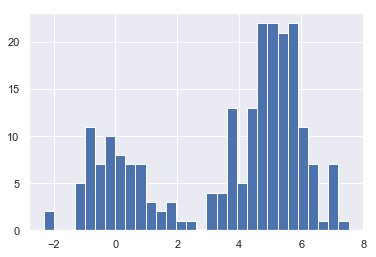

In [30]:
hist = plt.hist(x,bins=30, normed=False)

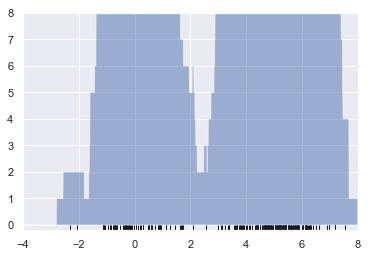

In [27]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

(-0.02, 0.22)

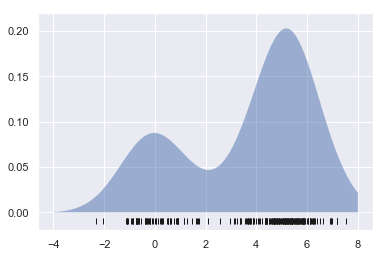

In [28]:
from sklearn.neighbors import KernelDensity


# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # to get back the distribution
# in we do expt(log) = sigma  
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)


In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),{'bandwidth':np.linspace(0.1,1.0,30)},cv = 5)
grid.fit(x[:,None])
print(grid.best_params_)

{'bandwidth': 0.5655172413793104}


In [34]:
#rough
import pandas as pd
m = [[1,2],[3,5]]
df = pd.DataFrame(m)
df

,0,1
0,1,2
1,3,5
